#### Name: Aamir Husain

# Deep learning from scratch
## Homework 3
### Exercise 2

-----

### General instructions

Complete the exercise listed below in this Jupyter notebook - leaving all of your code in Python cells in the notebook itself.  Feel free to add any necessary cells. 

### When submitting this homework:

Make sure you have put your name at the top of each file
    
Make sure all output is present in your notebook prior to submission

----

## <span style="color:#a50e3e;">Exercise 2. </span>  Implement the ``maxout`` activation function

So far we have seen various activation functions, most notably the tanh and relu functions defined below

\begin{array}
\
a(x) = \text{tanh}(w_0 + w_1x) \\
a(x) = \text{max}(0,w_0 + w_1x) \\
\end{array}

In this exercise you will implement the so-called [*maxout* activation](https://arxiv.org/pdf/1302.4389.pdf).  This function, defined as

\begin{array}
\
a(x) = \text{max}(v_0 + v_1x, \,w_0 + w_1x) \\
\end{array}

this activation takes maximum of two linear combinations of the input, instead of one linear combination and zero like the relu function.  While this change is algebraically rather minor, multilayer perceptron architectures employing the *maxout* activation tends to have certain advantages over those employing tanh and relu activations, including

- fewer issues with problematic initialization, e.g., values close too (or equal to) zero for the *relu* activation are bad because the relu is minimized at zero

- fewer issues with gradients vanishing or exploding, as can occur when using the tanh activation

- faster convergence with far fewer gradient descent steps

These advantages come with a simple price: the maxout activation has twice as many internal parameters as either the relu or tanh, hence architectures built with them have roughly twice as many parameters to tune.

Implement this activation and appropriately adjust the corresponding  `Python` code so that you can build MLP feature transformations using the maxout activation.  The necessary code block adjustments include

- changing the nonlinearity used in the function ``activation``

- adjusting the `feature_transform` function that computes the MLP

- adjusting the weight initialization module so that instead of creating one random weight matrix per hidden layer, you create and store two random weight matrices of identical size for every layer of the network

and add this new functionality to your deep learning library `my_first_DL_lib`.

Test out your code using a 5 layer input / activation output normalized architecture with 10 units in each layer, and fit this using a maximum of 200 steps of gradient descent to our prototype nonlinear regression dataset (the noisy sinusoidal dataset) - which you will find in the `datasets` directory.  Within this number of steps you should be able to achieve a very good fit to the dataset (so you will want to plot your fit after training!). Use a steplength parameter $\alpha$ of the form $10^{-\gamma}$ where $\gamma$ is the smallest positive integer that produces convergence with your random initial set of weights.

**You should turn in:**
    
**1)** your adjusted code blocks
    
**2)** a cost function plot for your run of gradient descent that achieves the desired goal

**3)** a plot showing your tuned model - using the best weights you found from your descent run - fit to the data (this model should overfit the given data)

Data Normalized as: standard
Feature transform: multilayer_perceptron
Activation: maxout
Layer sizes: [1, 10, 10, 10, 10, 1]
Cost function set to: least_squares
Standard gradient descent with alpha = 0.1 and beta = 0 @ 200 iterations


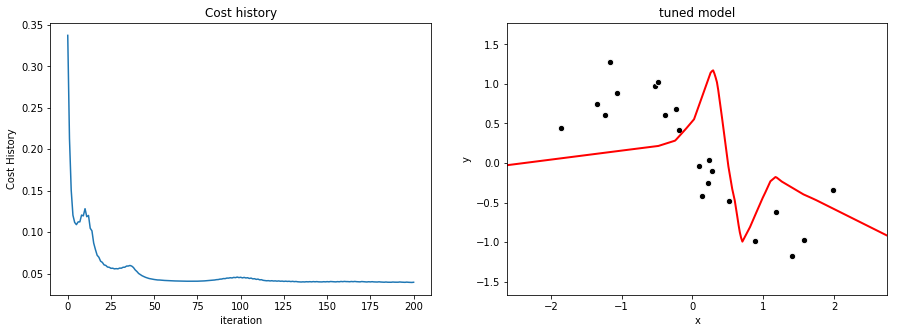

In [4]:
from dl_lib import deep_learner as DL
import autograd.numpy as np

csvname = "datasets/noisy_sin_sample.csv"
data = np.loadtxt(csvname, delimiter = ",")
x = data[:-1,:]
y = data[-1:,:]

learner = DL.Setup(x, y)
learner.choose_normalizer(name = 'standard')
N = 1
M = 1
layer_sizes = [N, 10, 10, 10, 10, M]
learner.choose_features(name = 'multilayer_perceptron', layer_sizes = layer_sizes, activation = 'maxout', scale = .3)
learner.choose_cost(name = 'least_squares')
learner.optimize(max_its = 200, alpha_choice = 1)
learner.plot_model()